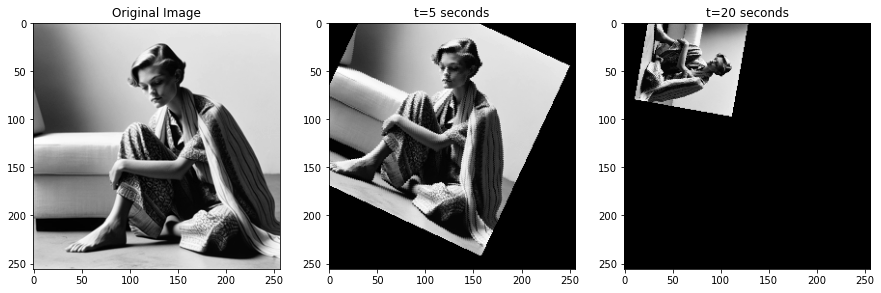

In [9]:
#(a) Special Effect via Compound Linear Geometric Modification
import numpy as np
import matplotlib.pyplot as plt
import math

# Given parameters
s = 3  # Percentage shrink per second
theta = 5  # Degrees rotation per second
m = 2  # Pixels per second translation

# Image dimensions
width, height = 256, 256

# Load the raw image
def load_raw_image(filename, width, height):
    with open(filename, 'rb') as f:
        image = np.fromfile(f, dtype=np.uint8)
    image = image.reshape((height, width))
    return image

# Reverse mapping functions
def reverse_map(x_prime, y_prime, t, center_x, center_y):
    # Scale factor for minification
    scale = 1 - (s / 100) * t
    # Rotation in radians
    rotation = math.radians(theta * t)
    # Translation offset
    translate = m * t

    # Apply minification
    x = x_prime / scale
    y = y_prime / scale
    
    # Apply rotation
    x_rot = (x - center_x) * math.cos(rotation) + (y - center_y) * math.sin(rotation) + center_x
    y_rot = -(x - center_x) * math.sin(rotation) + (y - center_y) * math.cos(rotation) + center_y

    # Apply translation towards south-east direction (down and right)
    x_trans = x_rot + translate
    y_trans = y_rot + translate

    return x_trans, y_trans

# Function to apply the geometric transformation
def apply_geometric_transformation(image, t):
    # Create an empty output image
    output_image = np.zeros_like(image)
    center_x, center_y = width // 2, height // 2

    # Iterate over each pixel in the output image
    for y_prime in range(height):
        for x_prime in range(width):
            # Calculate the reverse mapping
            x, y = reverse_map(x_prime, y_prime, t, center_x, center_y)

            # If the coordinates are within image boundaries
            if 0 <= x < width and 0 <= y < height:
                # Nearest neighbor interpolation
                output_image[y_prime, x_prime] = image[int(y), int(x)]

    return output_image

# Load the raw image file
barbara_raw = load_raw_image('./Project3_Images/1a.raw', 256, 256)

# Apply the transformation at t=5 and t=20
transformed_image_t5 = apply_geometric_transformation(barbara_raw, t=5)
transformed_image_t20 = apply_geometric_transformation(barbara_raw, t=20)

# Show the original and transformed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(barbara_raw, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(transformed_image_t5, cmap='gray')
plt.title('t=5 seconds')
plt.subplot(1, 3, 3)
plt.imshow(transformed_image_t20, cmap='gray')
plt.title('t=20 seconds')
plt.show()


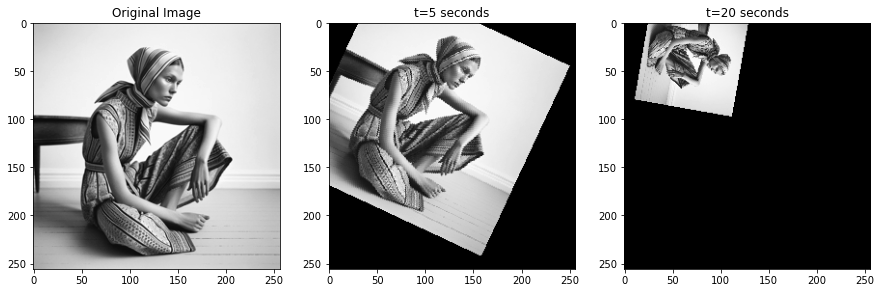

In [10]:
#(a) Special Effect via Compound Linear Geometric Modification
import numpy as np
import matplotlib.pyplot as plt
import math

# Given parameters
s = 3  # Percentage shrink per second
theta = 5  # Degrees rotation per second
m = 2  # Pixels per second translation

# Image dimensions
width, height = 256, 256

# Load the raw image
def load_raw_image(filename, width, height):
    with open(filename, 'rb') as f:
        image = np.fromfile(f, dtype=np.uint8)
    image = image.reshape((height, width))
    return image

# Reverse mapping functions
def reverse_map(x_prime, y_prime, t, center_x, center_y):
    # Scale factor for minification
    scale = 1 - (s / 100) * t
    # Rotation in radians
    rotation = math.radians(theta * t)
    # Translation offset
    translate = m * t

    # Apply minification
    x = x_prime / scale
    y = y_prime / scale
    
    # Apply rotation
    x_rot = (x - center_x) * math.cos(rotation) + (y - center_y) * math.sin(rotation) + center_x
    y_rot = -(x - center_x) * math.sin(rotation) + (y - center_y) * math.cos(rotation) + center_y

    # Apply translation towards south-east direction (down and right)
    x_trans = x_rot + translate
    y_trans = y_rot + translate

    return x_trans, y_trans

# Function to apply the geometric transformation
def apply_geometric_transformation(image, t):
    # Create an empty output image
    output_image = np.zeros_like(image)
    center_x, center_y = width // 2, height // 2

    # Iterate over each pixel in the output image
    for y_prime in range(height):
        for x_prime in range(width):
            # Calculate the reverse mapping
            x, y = reverse_map(x_prime, y_prime, t, center_x, center_y)

            # If the coordinates are within image boundaries
            if 0 <= x < width and 0 <= y < height:
                # Nearest neighbor interpolation
                output_image[y_prime, x_prime] = image[int(y), int(x)]

    return output_image

# Load the raw image file
barbara_raw = load_raw_image('./Project3_Images/1a2.raw', 256, 256)

# Apply the transformation at t=5 and t=20
transformed_image_t5 = apply_geometric_transformation(barbara_raw, t=5)
transformed_image_t20 = apply_geometric_transformation(barbara_raw, t=20)

# Show the original and transformed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(barbara_raw, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(transformed_image_t5, cmap='gray')
plt.title('t=5 seconds')
plt.subplot(1, 3, 3)
plt.imshow(transformed_image_t20, cmap='gray')
plt.title('t=20 seconds')
plt.show()


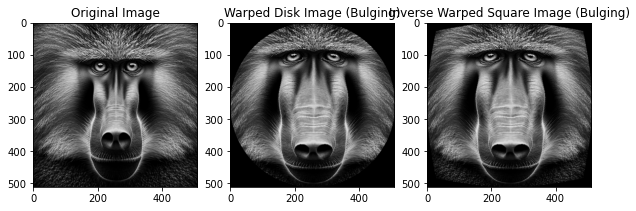

In [2]:
#(b) Spatial warping techniques
import numpy as np
import matplotlib.pyplot as plt

def square_to_disk_mapping(x, y, width, height, bulge_factor):
    # Normalize coordinates to range [-1, 1]
    x_normalized = (2 * x / width) - 1
    y_normalized = (2 * y / height) - 1

    # Calculate polar coordinates
    r = np.sqrt(x_normalized**2 + y_normalized**2)

    # Apply bulge effect using a power function
    r_mapped = r**bulge_factor

    # Discard pixels outside the circular boundary
    if r_mapped > 1:
        return None, None

    theta = np.arctan2(y_normalized, x_normalized)

    # Map polar coordinates to disk
    x_mapped = r_mapped * np.cos(theta)
    y_mapped = r_mapped * np.sin(theta)

    # Denormalize coordinates
    x_mapped = (x_mapped + 1) * 0.5 * width
    y_mapped = (y_mapped + 1) * 0.5 * height

    return x_mapped, y_mapped

def disk_to_square_mapping(x, y, width, height, bulge_factor):
    # Normalize coordinates to range [-1, 1]
    x_normalized = (2 * x / width) - 1
    y_normalized = (2 * y / height) - 1

    # Calculate Cartesian coordinates from polar coordinates
    r = np.sqrt(x_normalized**2 + y_normalized**2)
    theta = np.arctan2(y_normalized, x_normalized)

    # Apply bulge effect using a power function
    r_mapped = r**bulge_factor

    # Map Cartesian coordinates to square
    x_mapped = r_mapped * np.cos(theta)
    y_mapped = r_mapped * np.sin(theta)

    # Denormalize coordinates
    x_mapped = (x_mapped + 1) * 0.5 * width
    y_mapped = (y_mapped + 1) * 0.5 * height

    return x_mapped, y_mapped

# Assuming 'baboon.raw' is the file name
file_path = './Project3_Images/1b1.raw'
width, height = 512, 512  # Adjust these dimensions based on your image size

# Read the raw image file using NumPy
with open(file_path, 'rb') as file:
    raw_data = np.fromfile(file, dtype=np.uint8)
    original_image = raw_data.reshape((height, width))

# Bulge factor controls the strength of the bulging effect
bulge_factor = 1.5

# Forward warping: Square to Disk with Bulging
mapped_image_disk = np.zeros_like(original_image)
for y in range(height):
    for x in range(width):
        x_mapped, y_mapped = square_to_disk_mapping(x, y, width, height, bulge_factor)

        if x_mapped is not None and y_mapped is not None:
            x_mapped_int, y_mapped_int = int(x_mapped), int(y_mapped)
            mapped_image_disk[y, x] = original_image[y_mapped_int, x_mapped_int]

# Inverse warping: Disk to Square with Bulging
mapped_image_square = np.zeros_like(original_image)
for y in range(height):
    for x in range(width):
        x_mapped, y_mapped = disk_to_square_mapping(x, y, width, height, bulge_factor)
        x_mapped_int, y_mapped_int = int(x_mapped), int(y_mapped)

        if 0 <= x_mapped_int < width and 0 <= y_mapped_int < height:
            mapped_image_square[y, x] = original_image[y_mapped_int, x_mapped_int]

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(mapped_image_disk, cmap='gray')
plt.title('Warped Disk Image (Bulging)')

plt.subplot(1, 3, 3)
plt.imshow(mapped_image_square, cmap='gray')
plt.title('Inverse Warped Square Image (Bulging)')

plt.show()
